# Over dit document
In dit document wordt een CRISP-DM cycles doorlopen, welke vervolgens een dataproduct (visualisaties) op zal leveren. Tot slot wordt er een conclusie getrokken en advies gegeven. 

# Business understanding
Het ziekenhuis Isala wil de zorg voor diabetespatiënten verbeteren. Het gaat hier specifiek om het behandelproces door onnauwkeurigheden in metingen te filteren en hierop te baseren of een behandelplan aangepast moet worden of niet. Visualisaties zullen helpen bij het verkrijgen van inzicht van diverse meetmethoden om vervolgens conclusies te kunnen trekken. Die zijn er nog niet. 


Voor een als er een voorspelling wordt gemaakt: 

Daarbij zou een visualisatie van een voorspelling meer inzicht brengen in hoe de total error mogelijk zal veranderen per jaar. Dit zou kunnen resulteren in toekomstige plannen voor het standaardiseren van de HbA1c meetmethoden.

# Data understanding
Welke databronnen zijn gegeven en in welk formaat:
Een excel bestand genaamd: Complete-dataset-FINAL.xlsx
##### note
Het excel bestand dat gebruikt gaat worden, is het resultaat van rapporten die om zijn gezet naar excel. Dit is de meest recente versie waarin de meetmethoden zijn genormaliseerd en de waarden dubbelgecheckt zijn.

Hoe groot zijn deze databronnen:
355 kB

-4685 rijen

-12 kolommen


Kolomnamen: Method name, N (no. labs), Mean, Bias, CV, Sample, Reference value, Year, Source, Type, Manufacturer (fabrikant).

# Data preparation

Er is hier relatief weinig data preparatie nodig geweest. De kolommen zijn gegroepeerd en de niet-beschikbare data is gedropt. De niet te gebruiken data is ook gedropt, waardoor alleen de relevante kolommen overbleven.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Complete-dataset.xlsx")

In [2]:
df["Bias"] = df["Bias"].replace("-", np.nan)
df["Bias"] = pd.to_numeric(df["Bias"])

df["Mean"] = df["Mean"].replace("-", np.nan)
df["Mean"] = pd.to_numeric(df["Mean"])

df["CV"] = df["CV"].replace("-", np.nan)
df["CV"] = df["CV"].replace(" ", np.nan)
df["CV"] = pd.to_numeric(df["CV"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4602 non-null   float64
 3   Bias                 4058 non-null   float64
 4   CV                   4584 non-null   float64
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4682 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 439.2+ KB


In [6]:
df2= df.groupby(['Manufacturer']).mean()
df3= df2.sort_values(['CV']).dropna().drop(columns=['Mean', 'Year', 'Reference Value']).reset_index()
df3

,Manufacturer,Bias,CV,Total Error
0,Arkray,0.004359,1.355556,2.265347
1,Alere,-0.106306,2.067257,3.759140
2,Sebia,-0.098557,2.114286,4.110995
3,Tosoh,0.364331,2.219881,4.406559
4,JEOL,-0.025000,2.283333,1.790133
5,Trinity Biotech,0.103459,2.359677,4.626830
6,Bio-Rad,0.108246,2.639130,5.185594
7,Roche,-0.000128,2.678140,5.206686
8,Axis-Shield,-0.010000,2.900000,5.684000
9,Vitros,-0.021168,2.956173,5.794099


# Modeling

Er is hier gekozen voor een horizontale barplot, omdat op deze manier alle fabrikanten op een overzichtelijke en ordelijke manier gezien konden worden. Het is in één oogopslag duidelijk wat de beste en wat de slechtste fabrikant is op basis van gemiddelde CV-waarde van hun producten. De Y-as is omgedraaid voor een logischer verloop, zodat een lagere CV-waarde hoger staat in de 'ranglijst', omdat een lagere waarde wenselijker is dan een hoge.

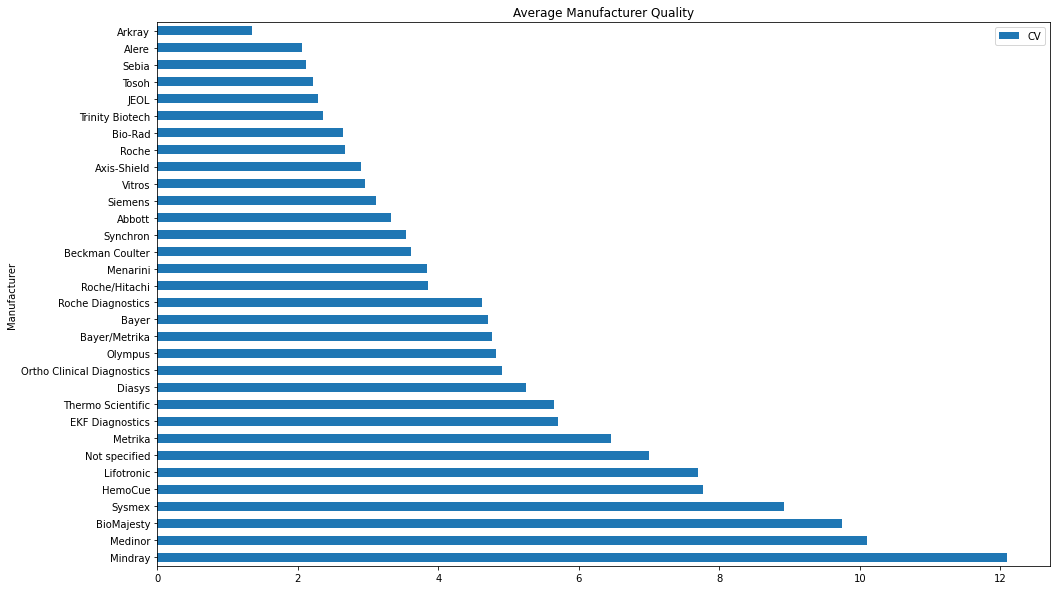

In [7]:
df3.plot.barh(x='Manufacturer', y='CV', figsize=(16,10), title='Average Manufacturer Quality').invert_yaxis()

# Evaluation

Deze grafiek reflecteert niet goed wat de huidige kwaliteit is. Wanneer een manufacturer in de afgelopen jaren enorm is verbeterd, lijkt het op deze manier alsnog minder goed dan dat het nu is. Het is echter wel een indicatie van de gemiddelde kwaliteit over de tijd. Manufacturers waarvan de Total Error onbekend was zijn uit de visualisatie weggelaten.

Er was in eerste instantie voor gekozen om de Total Error te gebruiken als maatstaaf voor deze vergelijking. Achteraf is gebleken dat op de CV-waardes na onze gegevens niet helemaal accuraat zijn. Daarom zijn hier nu toch de CV-waardes gebruikt om toch nog enige waarde te kunnen leveren aan de opdrachtgever.

Het advies voor het gebruik van deze visualisatie van het verschil in CV-waardes is het achterhalen van de oorzaken van de grote verschillen tussen de merken. Het kan ziekenhuispersoneel ook informeren over de afwijking waar zij rekening mee moeten houden bij het gebruik van meetapparaten van deze merken.